Load in libraries

In [1]:
%pip install pydataset
from pydataset import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 40.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=c73ad1e3ed5633b0f29bcddcc1e94629755f4d80a86e2469481430779ca4b35e
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


Working with professor salaries again.

In [2]:
prof = pd.DataFrame(data("Salaries"))
prof.head(10)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
1,Prof,B,19,18,Male,139750
2,Prof,B,20,16,Male,173200
3,AsstProf,B,4,3,Male,79750
4,Prof,B,45,39,Male,115000
5,Prof,B,40,41,Male,141500
6,AssocProf,B,6,6,Male,97000
7,Prof,B,30,23,Male,175000
8,Prof,B,45,45,Male,147765
9,Prof,B,21,20,Male,119250
10,Prof,B,18,18,Female,129000


For now, let's just focus on the years of service variable.

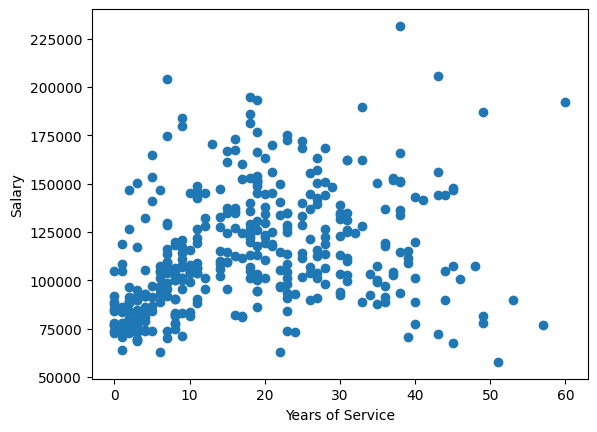

In [3]:
plt.scatter(prof["yrs.service"],prof.salary)
plt.xlabel("Years of Service")
plt.ylabel("Salary")
plt.show()

Fit a linear model with years of service as the only predictor. What is the MSE. How does the line look for the fit?

In [4]:
X = prof[["yrs.service"]]
y = prof.salary

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4321)

from sklearn.linear_model import LinearRegression

reg_prep = LinearRegression()
mod_reg = reg_prep.fit(X_train,y_train)

print({"Slope":mod_reg.coef_[0]})


{'Slope': 732.2902283695666}


How does this line look compared to the data?

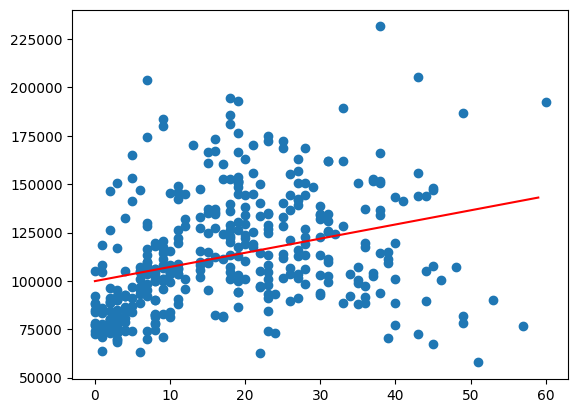

In [5]:
Beta_0 = mod_reg.intercept_
Beta_1 = mod_reg.coef_

# Plot the relationship with the straight line
plt.scatter(X,y)
x_axis = np.arange(0,60,1)
plt.plot(x_axis,Beta_0 + Beta_1*x_axis,color = "red")
plt.show()

How well does this fit?

In [6]:
out_sample_reg = mod_reg.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score


mse_reg_out = np.sqrt(mean_squared_error(y_test,out_sample_reg))
r2_reg_out = r2_score(y_test,out_sample_reg)
print(mse_reg_out)
print(r2_reg_out)

30053.355951657817
0.12283037034036415


Let's now add a variable to the data frame, years squared. This is one instance of what is called a higher order term.

In [7]:
X = prof[["yrs.service"]].copy()
X["years_squared"] = X["yrs.service"]**2
X["years_cubed"] = X["yrs.service"]**3

X

,yrs.service,years_squared,years_cubed
1,18,324,5832
2,16,256,4096
3,3,9,27
4,39,1521,59319
5,41,1681,68921
...,...,...,...
393,30,900,27000
394,19,361,6859
395,25,625,15625
396,15,225,3375


In [8]:
X = prof[["yrs.service"]].copy()
X["years_squared"] = X["yrs.service"]**2
X["years_cubed"] = X["yrs.service"]**3
y = prof.salary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4321)

reg_prep2 = LinearRegression()
mod_reg2 = reg_prep2.fit(X_train,y_train)

print({"linear term":mod_reg2.coef_[0]})
print({"quadratic term":mod_reg2.coef_[1]})
print({"cubic term":mod_reg2.coef_[2]})

{'linear term': 5364.027834615887}
{'quadratic term': -177.72781153230142}
{'cubic term': 1.709520251999578}


What does this line lool like against the data?

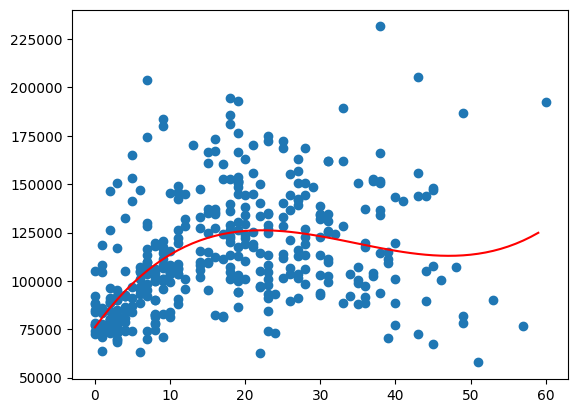

In [9]:
Beta_0 = mod_reg2.intercept_
Beta_1 = mod_reg2.coef_[0]
Beta_2 = mod_reg2.coef_[1]
Beta_3 = mod_reg2.coef_[2]

plt.scatter(prof[["yrs.service"]],y)
x_axis = np.arange(0,60,1)

plt.plot(x_axis,Beta_0 + Beta_1*x_axis + Beta_2*x_axis**2 + Beta_3*x_axis**3,color = "red")
plt.show()

How well does this new model fit?

In [10]:
out_sample_reg = mod_reg2.predict(X_test)

mse_reg_out = np.sqrt(mean_squared_error(y_test,out_sample_reg))
r2_reg_out = r2_score(y_test,out_sample_reg)
print(mse_reg_out)
print(r2_reg_out)

28060.566123299017
0.23530105031596216


In [11]:
X

,yrs.service,years_squared,years_cubed
1,18,324,5832
2,16,256,4096
3,3,9,27
4,39,1521,59319
5,41,1681,68921
...,...,...,...
393,30,900,27000
394,19,361,6859
395,25,625,15625
396,15,225,3375


Let's look at the discipline variable along with years of service.


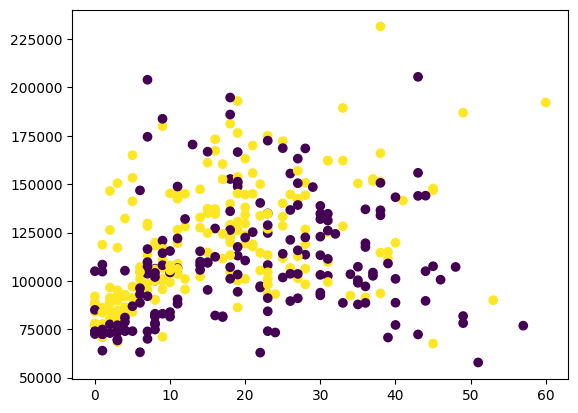

In [12]:
plt.scatter(prof[["yrs.service"]],y,c = prof.discipline.astype("category").cat.codes)


In [13]:
X = pd.get_dummies(prof[["yrs.service","discipline"]],drop_first = True)
y = prof.salary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4321)

reg_prep3 = LinearRegression()
mod_reg3 = reg_prep3.fit(X_train,y_train)


Vizualize this in 2 dimensions.

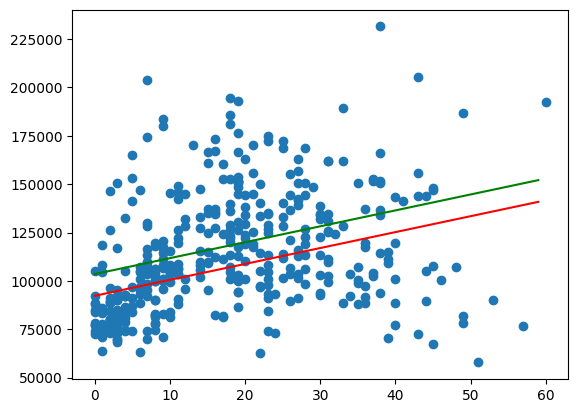

In [14]:
Beta_0 = mod_reg3.intercept_
Beta_1 = mod_reg3.coef_[0]
Beta_2 = mod_reg3.coef_[1]

plt.scatter(prof[["yrs.service"]],y)
x_axis = np.arange(0,60,1)

plt.plot(x_axis,Beta_0 + Beta_1*x_axis,color = "red")
plt.plot(x_axis,Beta_0 + Beta_1*x_axis + Beta_2,color = "green")
plt.show()

In [15]:
X = pd.get_dummies(prof[["yrs.service","discipline"]],drop_first = True)
X

,yrs.service,discipline_B
1,18,1
2,16,1
3,3,1
4,39,1
5,41,1
...,...,...
393,30,0
394,19,0
395,25,0
396,15,0


Let's add an interaction between discipline and years of service.

In [16]:
X = pd.get_dummies(prof[["yrs.service","discipline"]],drop_first = True)
y = prof.salary
X["yrs_discipline"] = X["yrs.service"]*X["discipline_B"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)


reg_prep4 = LinearRegression()
mod_reg4 = reg_prep2.fit(X_train,y_train)





In [17]:
X

,yrs.service,discipline_B,yrs_discipline
1,18,1,18
2,16,1,16
3,3,1,3
4,39,1,39
5,41,1,41
...,...,...,...
393,30,0,0
394,19,0,0
395,25,0,0
396,15,0,0


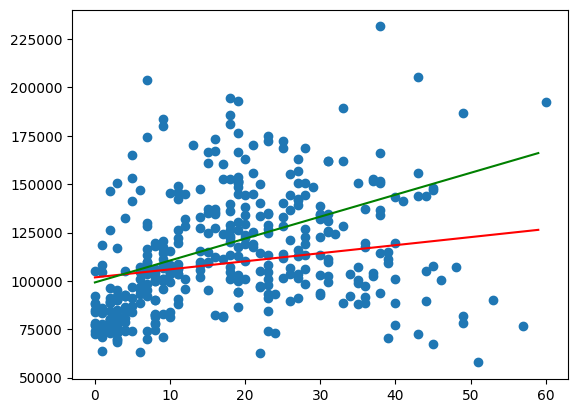

In [18]:
Beta_0 = mod_reg4.intercept_
Beta_1 = mod_reg4.coef_[0]
Beta_2 = mod_reg4.coef_[1]
Beta_3 = mod_reg4.coef_[2]

plt.scatter(prof[["yrs.service"]],y)
x_axis = np.arange(0,60,1)

plt.plot(x_axis,Beta_0 + Beta_1*x_axis,color = "red")
plt.plot(x_axis,Beta_0 + Beta_2 + (Beta_1+Beta_3)*x_axis,color = "green")
plt.show()

In [19]:
X = pd.get_dummies(prof[["yrs.service","discipline","sex","rank"]],drop_first = True)
y = prof.salary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
reg_prep = LinearRegression()
mod_reg = reg_prep.fit(X_train,y_train)

out_sample_reg = mod_reg.predict(X_test)

mse_reg_out = np.sqrt(mean_squared_error(y_test,out_sample_reg))
r2_reg_out = r2_score(y_test,out_sample_reg)
print(mse_reg_out)
print(r2_reg_out)

23623.950363889122
0.4529907611769243


In [20]:
X

,yrs.service,discipline_B,sex_Male,rank_AsstProf,rank_Prof
1,18,1,1,0,1
2,16,1,1,0,1
3,3,1,1,1,0
4,39,1,1,0,1
5,41,1,1,0,1
...,...,...,...,...,...
393,30,0,1,0,1
394,19,0,1,0,1
395,25,0,1,0,1
396,15,0,1,0,1


In [34]:
X = pd.get_dummies(prof[["yrs.service","discipline","rank","sex"]],drop_first = True)
X["yearsquared"] = X["yrs.service"]**2
X["years_cubed"] = X["yrs.service"]**3
X["yrs_discipline"] = X["yrs.service"]*X["discipline_B"]
X["yrs_sq_disc"] = X["yearsquared"]*X["discipline_B"]
X["yrs_cbd_disc"] = X["years_cubed"]*X["discipline_B"]
y = prof.salary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
reg_prep = LinearRegression()
mod_reg = reg_prep.fit(X_train,y_train)

out_sample_reg = mod_reg.predict(X_test)

mse_reg_out = np.sqrt(mean_squared_error(y_test,out_sample_reg))
r2_reg_out = r2_score(y_test,out_sample_reg)
print(mse_reg_out)
print(r2_reg_out)

22581.863896364197
0.5001851104994081


Let's look at the p-values we can get. This also introduces the other way to do statsmodels. One downside of using scikit-style matrices in statsmodels is youo have too add a constant manually.

In [26]:
import statsmodels.api as sm

# Adding a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fitting the OLS model
model = sm.OLS(y_train, X_train_sm).fit()

# Summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     21.49
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           3.63e-29
Time:                        22:59:25   Log-Likelihood:                -3161.8
No. Observations:                 277   AIC:                             6346.
Df Residuals:                     266   BIC:                             6386.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8.434e+04   9043.184      9.

In [23]:
X_all = X.copy()

In [35]:
X = X.drop(columns = ["sex_Male"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Adding a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fitting the OLS model
model = sm.OLS(y_train, X_train_sm).fit()

# Summary of the model
print(model.summary())

# Predicting on the test set
y_pred = model.predict(X_test_sm)

# Calculating out-of-sample R^2
out_sample_r2 = r2_score(y_test, y_pred)

# Displaying the out-of-sample R^2
print(f'Out-of-sample R^2: {out_sample_r2:.4f}')

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     23.57
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           1.87e-29
Time:                        23:02:15   Log-Likelihood:                -3162.9
No. Observations:                 277   AIC:                             6346.
Df Residuals:                     267   BIC:                             6382.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            8.94e+04   8309.962     10.